In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt


In [0]:
import seaborn as sns

In [0]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.shape

(1460, 81)

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


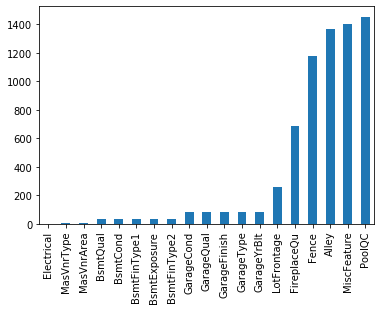

In [17]:
df.isna().sum()[df.isna().sum() > 0].sort_values().plot(kind="bar")

In [0]:
df = df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

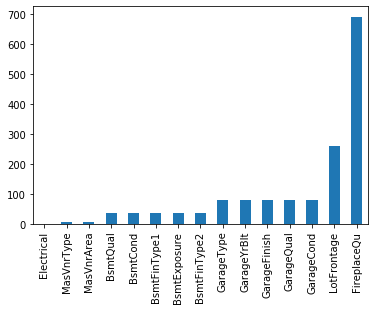

In [29]:
df.isna().sum()[df.isna().sum() > 0].sort_values().plot(kind="bar")

In [32]:
df.FireplaceQu.describe(include="all")

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [33]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [0]:
df.loc[df.FireplaceQu.isna(), "FireplaceQu"] = "NotDefined"

In [36]:
df.FireplaceQu.value_counts()

NotDefined    690
Gd            380
TA            313
Fa             33
Ex             24
Po             20
Name: FireplaceQu, dtype: int64

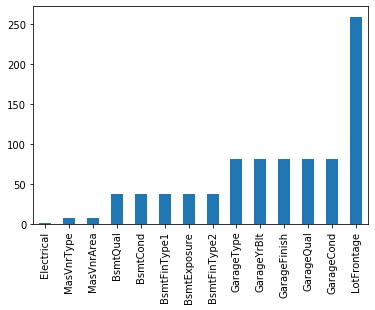

In [37]:
df.isna().sum()[df.isna().sum() > 0].sort_values().plot(kind="bar")

In [38]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

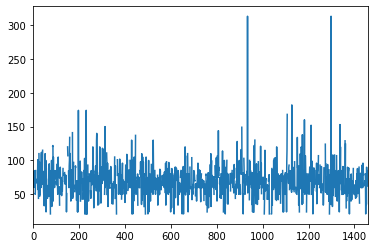

In [39]:
df.LotFrontage.plot()

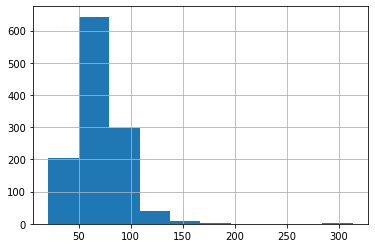

In [40]:
df.LotFrontage.hist()

In [0]:
df.loc[df.LotFrontage.isna(), "LotFrontage"] = df.LotFrontage.mean()

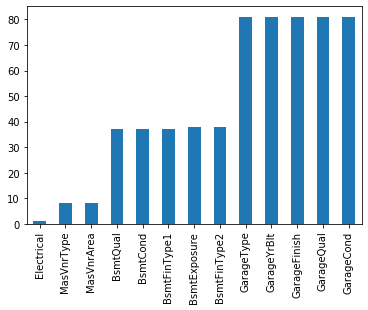

In [43]:
df.isna().sum()[df.isna().sum() > 0].sort_values().plot(kind="bar")

In [53]:
df.GarageType.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageType, Length: 1460, dtype: bool

In [55]:
df.GarageType.isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageType, Length: 1460, dtype: bool

In [62]:
garage_null_index = df.GarageYrBlt.isna()[df.GarageYrBlt.isna() == True].index

Series([], Name: GarageYrBlt, dtype: bool)

In [58]:
garage_null_index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [59]:
df.loc[garage_null_index, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NotDefined,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


In [0]:
df = df.drop(index=garage_null_index)

In [63]:
df.shape

(1379, 77)

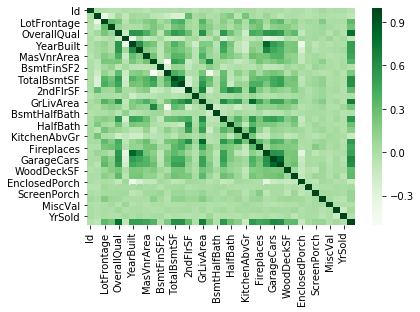

In [65]:
sns.heatmap(df.corr(), cmap="Greens")

In [0]:
dfcorr = df.corr()

In [0]:
corr_salesprice = abs(dfcorr["SalePrice"])

In [81]:
corr_salesprice.sort_index()

1stFlrSF         0.594935
2ndFlrSF         0.313336
3SsnPorch        0.039226
BedroomAbvGr     0.164655
BsmtFinSF1       0.375563
BsmtFinSF2       0.023243
BsmtFullBath     0.225988
BsmtHalfBath     0.025651
BsmtUnfSF        0.213135
EnclosedPorch    0.120164
Fireplaces       0.448877
FullBath         0.556550
GarageArea       0.608405
GarageCars       0.637095
GarageYrBlt      0.486362
GrLivArea        0.708172
HalfBath         0.270721
Id               0.027636
KitchenAbvGr     0.135574
LotArea          0.252921
LotFrontage      0.329314
LowQualFinSF     0.008364
MSSubClass       0.077707
MasVnrArea       0.468083
MiscVal          0.017933
MoSold           0.043749
OpenPorchSF      0.333036
OverallCond      0.095278
OverallQual      0.787228
PoolArea         0.091518
SalePrice        1.000000
ScreenPorch      0.099453
TotRmsAbvGrd     0.538309
TotalBsmtSF      0.603583
WoodDeckSF       0.312631
YearBuilt        0.507584
YearRemodAdd     0.505434
YrSold           0.026726
Name: SalePr

In [79]:
corr_salesprice[corr_salesprice > 0.55]

OverallQual    0.787228
TotalBsmtSF    0.603583
1stFlrSF       0.594935
GrLivArea      0.708172
FullBath       0.556550
GarageCars     0.637095
GarageArea     0.608405
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [0]:
interetsing_cols = corr_salesprice[corr_salesprice > 0.55].index

In [0]:
df2 = df.loc[:, interetsing_cols]

In [87]:
df2.isna().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

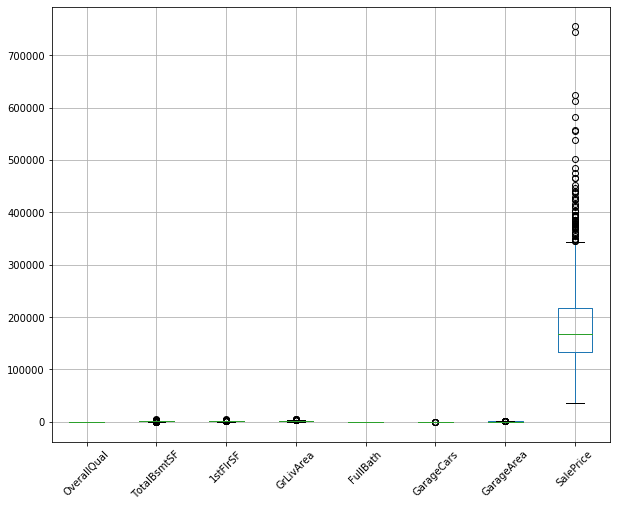

In [90]:
plt.figure(figsize=(10,8))
df2.boxplot()
plt.xticks(rotation=45)

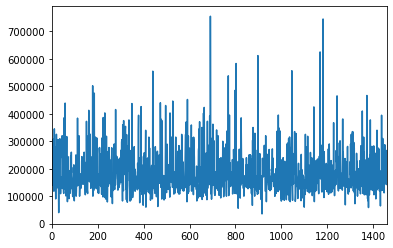

In [93]:
df2.SalePrice.plot()

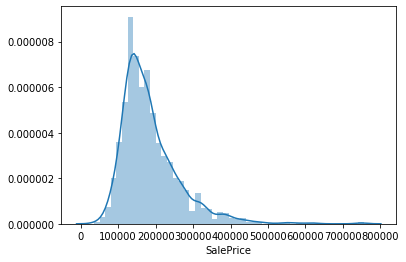

In [95]:
sns.distplot(df2.SalePrice)

In [98]:
q1 = np.percentile(df2.SalePrice, 25)
q3 = np.percentile(df2.SalePrice, 75)
IQR = q3 - q1
ideal_max_sp = (1.5 * IQR) + q3
ideal_max_sp

343375.0

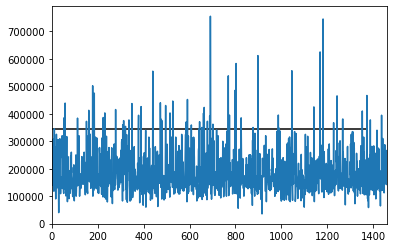

In [102]:
df2.SalePrice.plot()
plt.hlines(ideal_max_sp, 0, df2.shape[0])

In [103]:
df2

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,2,548,208500
1,6,1262,1262,1262,2,2,460,181500
2,7,920,920,1786,2,2,608,223500
3,7,756,961,1717,1,3,642,140000
4,8,1145,1145,2198,2,3,836,250000
...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,2,460,175000
1456,6,1542,2073,2073,2,2,500,210000
1457,7,1152,1188,2340,2,1,252,266500
1458,5,1078,1078,1078,1,1,240,142125


In [0]:
df2 = df2.drop(columns=["GarageArea"])

In [106]:
df2.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,856,856,1710,2,2,208500
1,6,1262,1262,1262,2,2,181500
2,7,920,920,1786,2,2,223500
3,7,756,961,1717,1,3,140000
4,8,1145,1145,2198,2,3,250000


In [117]:
df2.shape

(1379, 7)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
X = df2.drop(columns=["SalePrice"])
Y = df2[["SalePrice"]]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [120]:
X_train.shape, X_test.shape, Y_train.shape , Y_test.shape

((1103, 6), (276, 6), (1103, 1), (276, 1))

In [119]:
1103 + 276

1379

In [0]:
lr = LinearRegression()

In [122]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
lr.coef_

array([[2.53033810e+04, 2.17443514e+01, 8.45674832e+00, 4.35340078e+01,
        4.20909846e+02, 2.00060530e+04]])

In [124]:
lr.intercept_

array([-109448.92038922])

In [0]:
Y_pred = lr.predict(X_test)

# X_test - Ground truth is Y_test 
# Now we take this X_test to the ML MODEL (lr) 
# Model gives some prediction - we save those predictions as Y_pred
# Now we can compare the model performance through comparing Y_pred and Y_test

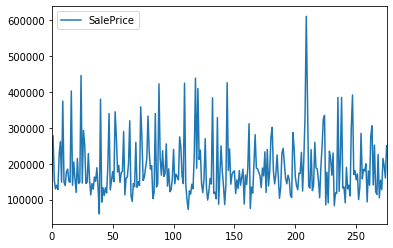

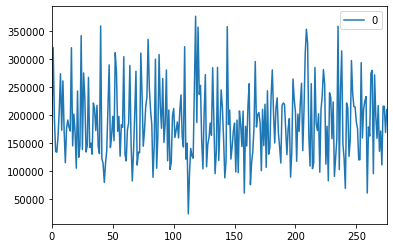

In [138]:
Y_test.reset_index(drop=True).plot()
pd.DataFrame(Y_pred).plot()
plt.show()

ValueError: ignored

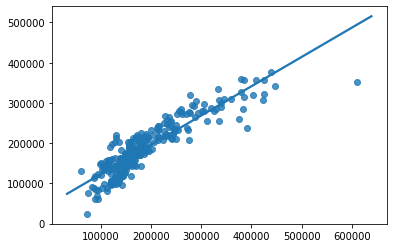

In [139]:
sns.regplot(Y_test, Y_pred)

In [132]:
Y_test.reset_index(drop=True)

,SalePrice
0,173000
1,278000
2,155000
3,129900
4,140000
...,...
271,128000
272,214900
273,194500
274,160000


In [0]:
Y_test = Y_test.reset_index(drop=True)

In [0]:
Y_pred = pd.DataFrame(Y_pred, columns=["Pred_SalePrice"])

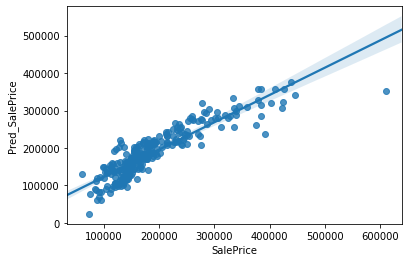

In [147]:
sns.regplot(Y_test.SalePrice, Y_pred.Pred_SalePrice)

In [0]:
# 1 - 1
# 2 - 4
# 3 - 9
# 4 - 16
# 5 - 25
# 6 - 36 
# 7 - 49
# 8 - 64
# 9 - 81
# 10 - 100

In [0]:
from sklearn.metrics import mean_squared_error
import math

In [0]:
# Root Mena Squarre Error

In [156]:
64**0.5

8.0

In [153]:
mean_squared_error(Y_test.SalePrice, Y_pred.Pred_SalePrice)

36812.97300347433

In [170]:
mean_squared_error(Y_test.SalePrice, Y_pred.Pred_SalePrice)**0.5

36812.97300347433

In [161]:
((Y_test.SalePrice - Y_pred.Pred_SalePrice)**2).mean()**0.5

36812.97300347433

In [165]:
abs((Y_test.SalePrice - Y_pred.Pred_SalePrice) / Y_test.SalePrice * 100).mean()

14.942391627939857

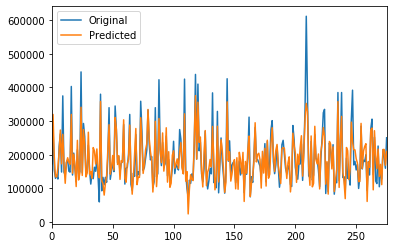

In [168]:
Y_test.SalePrice.plot(label= "Original")
Y_pred.Pred_SalePrice.plot(label = "Predicted")
plt.legend()